- estimation
- sampling
- search(MCTS)

## 黎曼和式积分（Reimann Sum）

- 积分即是求面积（求和）

In [41]:
from IPython.display import Image

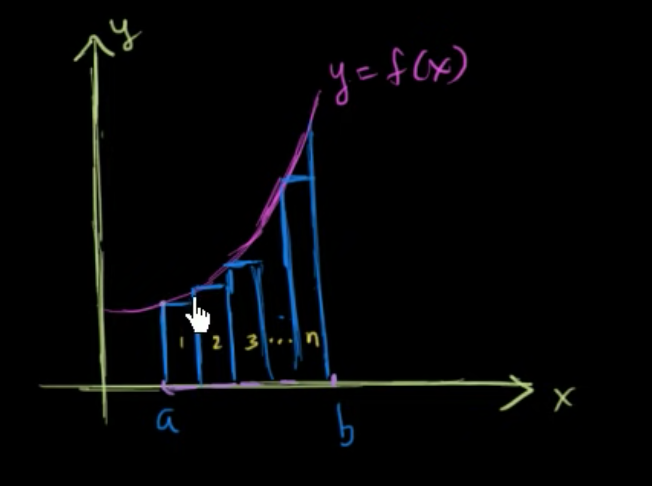

In [44]:
Image('./imgs/1280X1280.PNG', width=400)

$$
\begin{split}
&\int_a^bf(x)dx=\lim_{n\to \infty}\sum_{i=1}^nf(x_i)\Delta x\\
&\Delta x=\frac{b-a}n\\
&x_i=a+\frac{b-a}n\cdot (i-1)
\end{split}
$$

- $\Delta x$ width of rectangle, $dx$ is infinitely small;
  - $\int_a^b $：infintely number of the rectangles;

$$
\int_\pi^{2\pi}\cos(x)dx=\sum_{i=1}^n\cos(\pi+\frac{\pi}n\cdot i)\frac{2\pi-\pi}n=\sum_{i=1}^n\cos(\pi+\frac{\pi}n\cdot i)\frac{\pi}n
$$

In [45]:
import numpy as np

def cos(x):
    return np.cos(x)

def reimann_sum(f, a, b, N=1000):
    total_sum = 0
    for i in range(1, N+1):
        total_sum += f(a+(b-a)/N*i)
    return (b-a)/N*total_sum

In [46]:
# https://www.wolframalpha.com/input?i2d=true&i=integrate++cos%5C%2840%29x%5C%2841%29+from+x%3Dpi+to+2pi
reimann_sum(cos, np.pi, 2*np.pi, N=100000)

3.141592653553481e-05

$$\sum_{i=1}^n\ln(2+\frac{5i}n)\frac{5}{n}$$

- 由和式积分到原始积分
- $\frac{5}n=\frac{b-a}n$
- $2+\frac{5i}n=a+\frac{b-a}ni$
- $b-a=5, a=2 => b=7$
$$
\int_2^7\ln(x)dx
$$

In [47]:
def ln(x):
    return np.log(x)

In [48]:
reimann_sum(ln, 2, 7, N=100000)

7.235108001267132

In [49]:
5/100000*sum([ln(2+5*i/100000) for i in range(1, 100000+1)])

7.235108001267132

## expected value 

$$
\begin{split}
\mathbb{E}(f(x))&=\int f(x)p(x)dx\\
&=\lim_{N\to \infty}\frac1N\sum_{i=1}^Nf(x_i)_{x_i\sim p(x)}
\end{split}\\
\begin{split}
\mathbb{E}(x)&=\int xp(x)dx\\
&=\lim_{N\to \infty}\frac1N\sum_{i=1}^Nx_i{_{x_i\sim p(x)}}
\end{split}
$$

In [19]:
from scipy import stats
import numpy as np

In [13]:
def expected(rv, N=10**6):
    return sum([rv.rvs() for _ in range(N)])/N

In [14]:
rv = stats.norm()

In [15]:
expected(rv)

0.0002996299393945298

In [50]:
mu, sigma = 1, 1 # mean and standard deviation
s = np.random.normal(mu, sigma, 10**8)
np.mean(s)

0.9999995379638114

## 求积分


$$\int_a^bf(x)dx$$
- Step 1： $[a,b]$ 内**均匀采样** $n$ 个点，记为 $x_1,x_2,...,x_n$
- Step 2：计算 $Q_n=(b-a)\frac1n\sum_{i=1}^nf(x_i)$（和式积分）

In [38]:
def calc_int(f, a, b, N=1000000):
    delta = (b-a)/N
    s = sum(map(f, np.random.uniform(a, b, N)))
    return s*delta

$$
f(x) = \frac{1}{1+\sinh(2x)\log(x)^2}
$$

In [51]:
f = lambda x: 1/(1+np.sinh(2*x)*np.log(x)**2)
a = 0.8
b = 3
# 0.6768410548630645
calc_int(f, a, b) 

0.6777835848557134

In [52]:
reimann_sum(f, a, b, N=1000000)

0.6768390965675425

In [ ]:
# https://www.wolframalpha.com/input?i2d=true&i=integrate++Divide%5B1%2C%5C%2840%291+%2B+Sinh%5B2*x%5D*Power%5B%5C%2840%29Log%5Bx%5D%5C%2841%29%2C2%5D%5C%2841%29%5D+from+x%3D0.8+to+3